# Importing All the required Library

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D,BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import pandas as pd
import keras.backend as K
import cv2

Importing the CIFAR-10 Dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Defining the Model

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)))
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)         

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(0.001),loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7674 - acc: 0.7360 - val_loss: 0.6820 - val_acc: 0.7618
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7200 - acc: 0.7525 - val_loss: 0.6525 - val_acc: 0.7788
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6787 - acc: 0.7673 - val_loss: 0.6519 - val_acc: 0.7792
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6426 - acc: 0.7783 - val_loss: 0.6199 - val_acc: 0.7925
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6133 - acc: 0.7891 - val_loss: 0.6225 - val_acc: 0.7902
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5904 - acc: 0.7959 - val_loss: 0.5939 - val_acc: 0.7986
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5688 - acc: 0.8045 - val_loss: 0.5927 - val_acc: 0.8028
Epoch 8/10
1563/1563 [==========================

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:-5]] # Getting all the ouputs of layers (mainly Conv layers)

In [ ]:
layer_outputs

[<tf.Tensor 'conv2d_5/Relu:0' shape=(None, 30, 30, 128) dtype=float32>,
 <tf.Tensor 'conv2d_6/Relu:0' shape=(None, 28, 28, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 14, 14, 128) dtype=float32>,
 <tf.Tensor 'dropout_4/cond/Identity:0' shape=(None, 14, 14, 128) dtype=float32>,
 <tf.Tensor 'conv2d_7/Relu:0' shape=(None, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'conv2d_8/Relu:0' shape=(None, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(None, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'dropout_5/cond/Identity:0' shape=(None, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'conv2d_9/Relu:0' shape=(None, 7, 7, 32) dtype=float32>,
 <tf.Tensor 'dropout_6/cond/Identity:0' shape=(None, 7, 7, 32) dtype=float32>]

In [ ]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Activation model from Image to Last layer before Flatten

Importing a image of cifar-10 classes (Aeroplane)

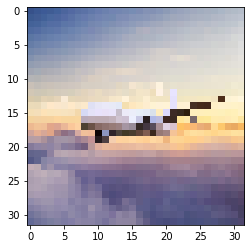

(1, 32, 32, 3)


In [ ]:
img = keras.preprocessing.image.load_img('a.jpg',target_size=(32,32,3))
img = keras.preprocessing.image.img_to_array(img)
array=keras.preprocessing.image.img_to_array(img)
array=np.expand_dims(array,axis=0)
img_tensor = array
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
model.predict(img_tensor)

array([[0.01994794, 0.00705175, 0.2063187 , 0.17225969, 0.26422638,
        0.04592136, 0.22877358, 0.01912298, 0.02850043, 0.00787729]],
      dtype=float32)

In [ ]:
activations = activation_model.predict(img_tensor) 
last_layer_activation = activations[8]
print(last_layer_activation.shape)

(1, 7, 7, 32)


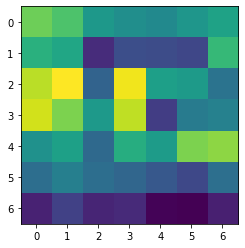

In [ ]:
heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])

In [ ]:
heatmap=heatmap[0,:,:,]
heatmap.shape

(7, 7)

Replacing all the 0 values with epsilon as it leads to mathematical errors

In [ ]:
eps = K.epsilon()
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]==0.:
        last_layer_activation[0][i][j][k]=eps

In [ ]:
last_layer_activation #final last layer activation

array([[[[1.00000001e-07, 1.00000001e-07, 1.75954956e+02, ...,
          1.00000001e-07, 1.00000001e-07, 1.00000001e-07],
         [3.33854027e+01, 1.00000001e-07, 8.10349197e+01, ...,
          1.00000001e-07, 1.00000001e-07, 1.00000001e-07],
         [1.00000001e-07, 1.00000001e-07, 1.38178345e+02, ...,
          1.00000001e-07, 1.00000001e-07, 6.64463196e+01],
         ...,
         [1.00000001e-07, 1.00000001e-07, 1.35166214e+02, ...,
          1.00000001e-07, 1.00000001e-07, 6.06854858e+01],
         [1.00000001e-07, 1.00000001e-07, 1.64828506e+02, ...,
          1.00000001e-07, 1.00000001e-07, 4.79073944e+01],
         [7.12294769e+01, 1.00000001e-07, 1.01570099e+02, ...,
          8.25197983e+00, 1.00000001e-07, 3.17642956e+01]],

        [[1.00000001e-07, 1.00000001e-07, 3.29737806e+00, ...,
          1.00000001e-07, 1.00000001e-07, 1.00000001e-07],
         [4.34948578e+01, 1.00000001e-07, 1.00000001e-07, ...,
          5.39723091e+01, 1.00000001e-07, 1.00000001e-07],
        

Creating another Ablated image for the process

In [ ]:
image_final=np.zeros_like(img_tensor)
activations_final = activation_model.predict(image_final) 

In [ ]:
activations_final

[array([[[[0.6795971 , 0.06449035, 1.2069532 , ..., 0.1766163 ,
           0.03976811, 0.07192809],
          [0.6795971 , 0.06449035, 1.2069532 , ..., 0.1766163 ,
           0.03976811, 0.07192809],
          [0.6795971 , 0.06449035, 1.2069532 , ..., 0.1766163 ,
           0.03976811, 0.07192809],
          ...,
          [0.6795971 , 0.06449035, 1.2069532 , ..., 0.1766163 ,
           0.03976811, 0.07192809],
          [0.6795971 , 0.06449035, 1.2069532 , ..., 0.1766163 ,
           0.03976811, 0.07192809],
          [0.6795971 , 0.06449035, 1.2069532 , ..., 0.1766163 ,
           0.03976811, 0.07192809]],
 
         [[0.6795971 , 0.06449035, 1.2069532 , ..., 0.1766163 ,
           0.03976811, 0.07192809],
          [0.6795971 , 0.06449035, 1.2069532 , ..., 0.1766163 ,
           0.03976811, 0.07192809],
          [0.6795971 , 0.06449035, 1.2069532 , ..., 0.1766163 ,
           0.03976811, 0.07192809],
          ...,
          [0.6795971 , 0.06449035, 1.2069532 , ..., 0.1766163 ,
   

In [ ]:
last_layer_activation_final = activations_final[8]
print(last_layer_activation_final.shape)

(1, 7, 7, 32)


Activation layer of ablated image

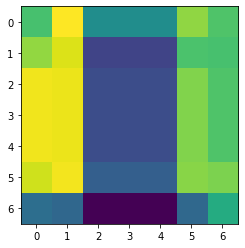

In [ ]:
heatmap_final = np.mean(last_layer_activation_final, axis=-1)
heatmap_final = np.maximum(heatmap_final, 0) / np.max(heatmap_final)
plt.imshow(heatmap_final[0])

In [ ]:
print(last_layer_activation.shape,last_layer_activation_final.shape)

(1, 7, 7, 32) (1, 7, 7, 32)


Calculating Weight ratio according to research paper

In [ ]:
weights_ratio=(last_layer_activation-last_layer_activation_final)/last_layer_activation

In [ ]:
weights_ratio

array([[[[ 1.0000000e+00,  1.0000000e+00,  9.6319979e-01, ...,
           1.0000000e+00, -6.6980848e+07,  1.0000000e+00],
         [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           1.0000000e+00, -2.0849331e+08,  1.0000000e+00],
         [ 1.0000000e+00,  1.0000000e+00,  9.2207551e-01, ...,
           1.0000000e+00,  1.0000000e+00,  6.9128484e-01],
         ...,
         [ 1.0000000e+00,  1.0000000e+00,  9.2033899e-01, ...,
           1.0000000e+00,  1.0000000e+00,  6.6197872e-01],
         [ 1.0000000e+00,  1.0000000e+00,  9.8700333e-01, ...,
          -6.7965296e+07,  1.0000000e+00,  2.6212990e-01],
         [ 1.0000000e+00,  1.0000000e+00,  9.6067566e-01, ...,
          -6.6434085e-01, -2.9448556e+07,  5.8487695e-01]],

        [[ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           1.0000000e+00, -3.1308254e+07,  1.0000000e+00],
         [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           9.8904055e-01, -2.9733898e+08,  1.0000000e+00],
        

In [ ]:
# Multipling the weight ratio with final activation layer
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    last_layer_activation[0][i][j]=(last_layer_activation[0][i][j]*weights_ratio[0][i][j])

Applying RELU to the Final activation layer ( product of weight ratio and activation layer)

In [ ]:
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]<0.:
        last_layer_activation[0][i][j][k]=0.
last_layer_activation

array([[[[1.00000001e-07, 1.00000001e-07, 1.69479782e+02, ...,
          1.00000001e-07, 0.00000000e+00, 1.00000001e-07],
         [3.33854027e+01, 1.00000001e-07, 8.10349197e+01, ...,
          1.00000001e-07, 0.00000000e+00, 1.00000001e-07],
         [1.00000001e-07, 1.00000001e-07, 1.27410866e+02, ...,
          1.00000001e-07, 1.00000001e-07, 4.59333344e+01],
         ...,
         [1.00000001e-07, 1.00000001e-07, 1.24398735e+02, ...,
          1.00000001e-07, 1.00000001e-07, 4.01725006e+01],
         [1.00000001e-07, 1.00000001e-07, 1.62686279e+02, ...,
          0.00000000e+00, 1.00000001e-07, 1.25579605e+01],
         [7.12294769e+01, 1.00000001e-07, 9.75759201e+01, ...,
          0.00000000e+00, 0.00000000e+00, 1.85782051e+01]],

        [[1.00000001e-07, 1.00000001e-07, 3.29737806e+00, ...,
          1.00000001e-07, 0.00000000e+00, 1.00000001e-07],
         [4.34948578e+01, 1.00000001e-07, 1.00000001e-07, ...,
          5.33808022e+01, 0.00000000e+00, 1.00000001e-07],
        

Heatmap of final activation layer

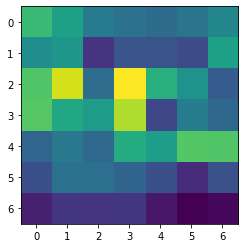

In [ ]:
heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
plt.savefig("heatmap.jpg")
heatmap=heatmap[0,:,:,]

# Super imposed image of original and heatmap

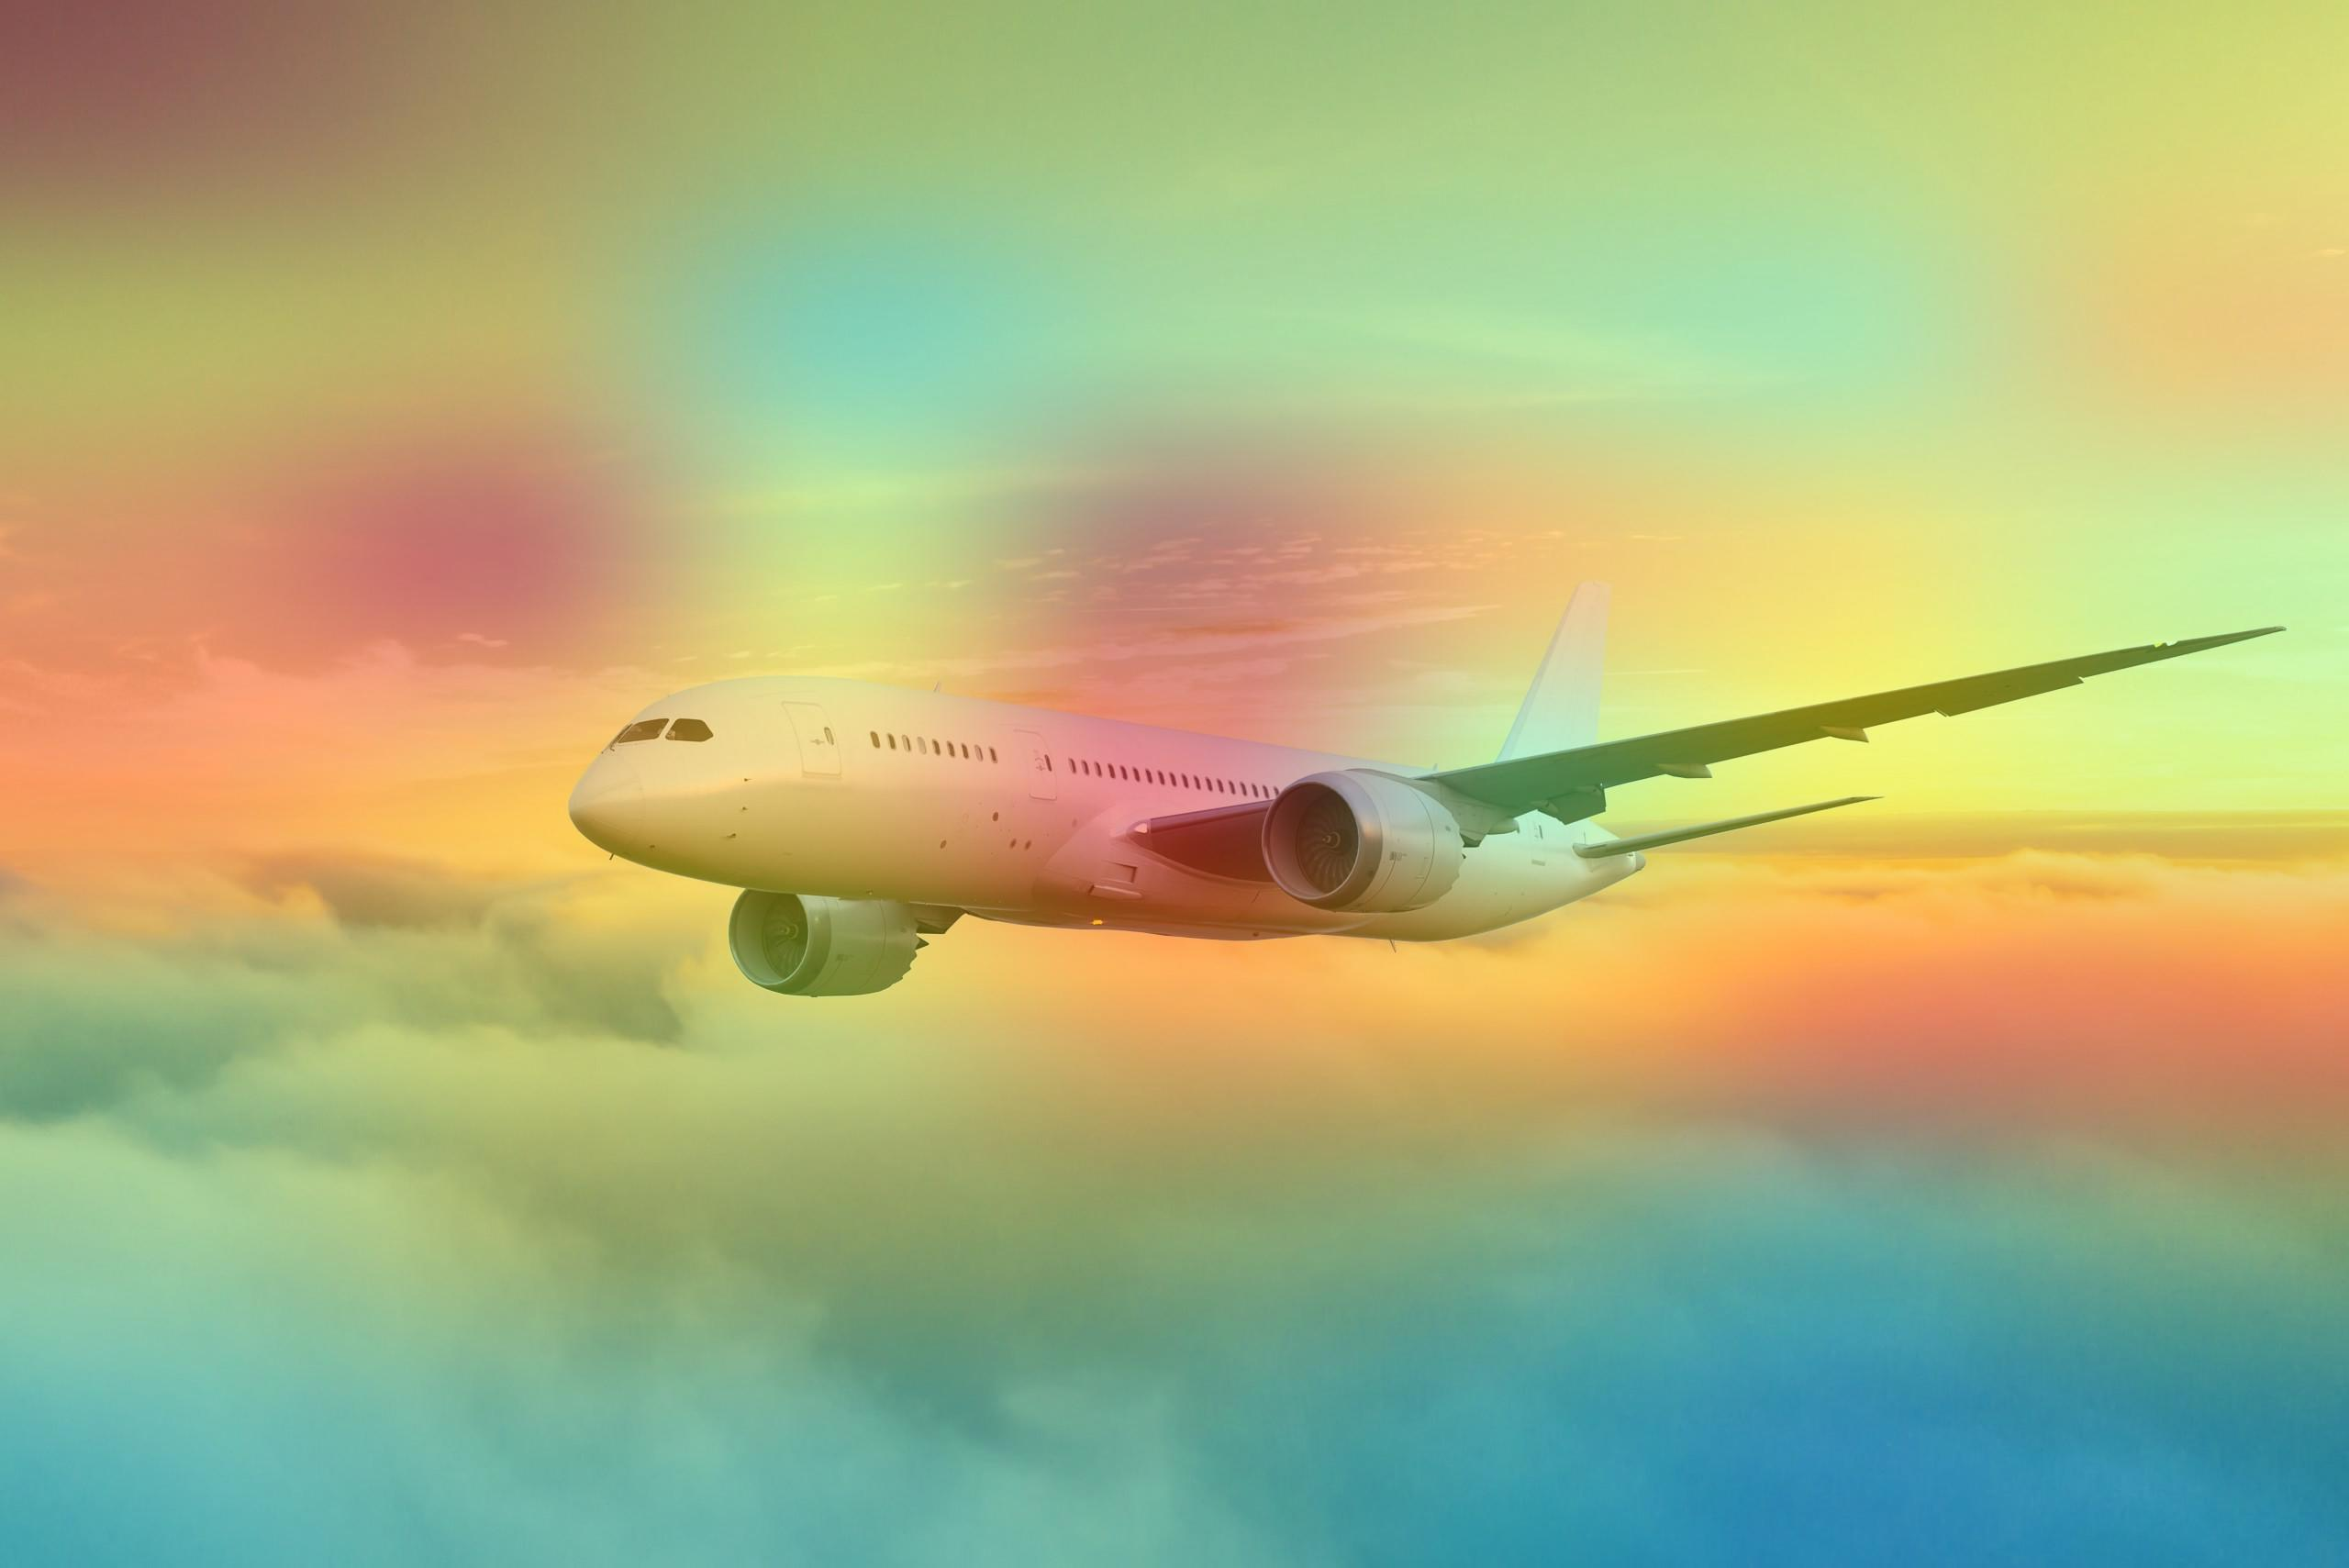

In [ ]:
img = keras.preprocessing.image.load_img('a.jpg')
img = keras.preprocessing.image.img_to_array(img)
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap * 0.7 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
save_path = "final_image_aeroplane.jpg"
superimposed_img.save(save_path)
display(Image(save_path))


This shows that the conv layer mainly focuses on the wings and the turbine of aeroplane for its classification

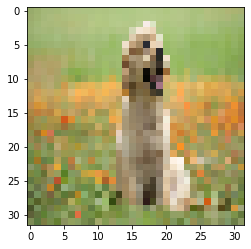

(1, 32, 32, 3)
(1, 7, 7, 32)


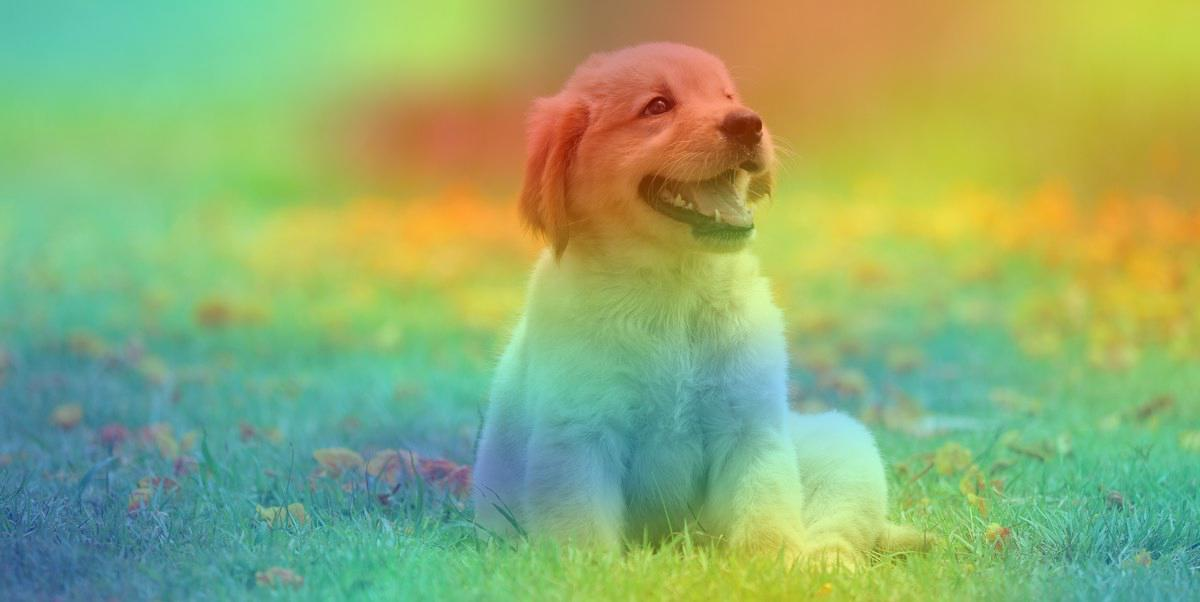

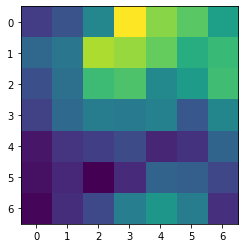

In [ ]:
img = keras.preprocessing.image.load_img('b.jpg',target_size=(32,32,3))
img = keras.preprocessing.image.img_to_array(img)
array=keras.preprocessing.image.img_to_array(img)
array=np.expand_dims(array,axis=0)
img_tensor = array
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

model.predict(img_tensor)

activations = activation_model.predict(img_tensor) 
last_layer_activation = activations[8]
print(last_layer_activation.shape)

heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
heatmap=heatmap[0,:,:,]

eps = K.epsilon()
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]==0.:
        last_layer_activation[0][i][j][k]=eps

image_final=np.zeros_like(img_tensor)
activations_final = activation_model.predict(image_final) 

last_layer_activation_final = activations_final[8]

heatmap_final = np.mean(last_layer_activation_final, axis=-1)
heatmap_final = np.maximum(heatmap_final, 0) / np.max(heatmap_final)
plt.imshow(heatmap_final[0])

weights_ratio=(last_layer_activation-last_layer_activation_final)/last_layer_activation

for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    last_layer_activation[0][i][j]=(last_layer_activation[0][i][j]*weights_ratio[0][i][j])

for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]<0.:
        last_layer_activation[0][i][j][k]=0.

heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
plt.savefig("heatmap_dog.jpg")
heatmap=heatmap[0,:,:,]

img = keras.preprocessing.image.load_img('b.jpg')
img = keras.preprocessing.image.img_to_array(img)
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap * 0.7 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
save_path = "final_image_dog.jpg"
superimposed_img.save(save_path)
display(Image(save_path))


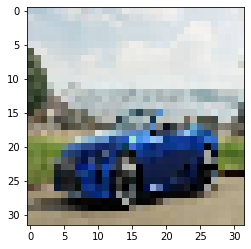

(1, 32, 32, 3)
(1, 7, 7, 32)


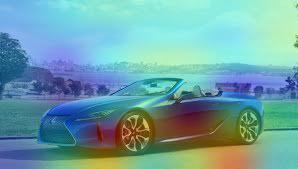

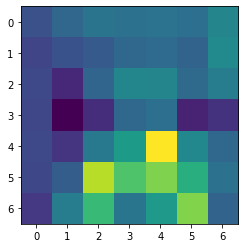

In [ ]:
img = keras.preprocessing.image.load_img('c.jpeg',target_size=(32,32,3))
img = keras.preprocessing.image.img_to_array(img)
array=keras.preprocessing.image.img_to_array(img)
array=np.expand_dims(array,axis=0)
img_tensor = array
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

model.predict(img_tensor)

activations = activation_model.predict(img_tensor) 
last_layer_activation = activations[8]
print(last_layer_activation.shape)

heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
heatmap=heatmap[0,:,:,]

eps = K.epsilon()
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]==0.:
        last_layer_activation[0][i][j][k]=eps

image_final=np.zeros_like(img_tensor)
activations_final = activation_model.predict(image_final) 

last_layer_activation_final = activations_final[8]

heatmap_final = np.mean(last_layer_activation_final, axis=-1)
heatmap_final = np.maximum(heatmap_final, 0) / np.max(heatmap_final)
plt.imshow(heatmap_final[0])

weights_ratio=(last_layer_activation-last_layer_activation_final)/last_layer_activation

for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    last_layer_activation[0][i][j]=(last_layer_activation[0][i][j]*weights_ratio[0][i][j])

for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]<0.:
        last_layer_activation[0][i][j][k]=0.

heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
plt.savefig("heatmap_car.jpg")
heatmap=heatmap[0,:,:,]

img = keras.preprocessing.image.load_img('c.jpeg')
img = keras.preprocessing.image.img_to_array(img)
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap * 0.7 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
save_path = "final_image_car.jpg"
superimposed_img.save(save_path)
display(Image(save_path))
